## Korelasyon Analizi

Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.total_bill=df.total_bill-df.tip

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


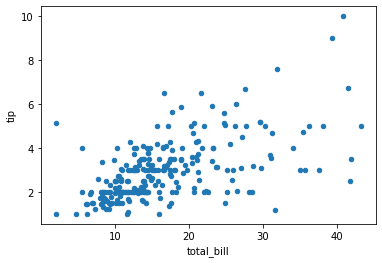

In [6]:
df.plot.scatter("total_bill","tip");

## Varsayım kontrolü 

In [19]:
from scipy.stats import shapiro
import scipy.stats as stats

In [11]:
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


#### Hipotez Testi

**Korelasyon Katsayısı**

In [13]:
df.tip.corr(df.total_bill)

0.5766634471096374

Şimdi ise varsayım sağlanmadığını bildiğimizden method'umuzu değiştiriyoruz.

In [14]:
df.tip.corr(df.total_bill,method="spearman")

0.593691939408997

**Korelasyonunu Anlamlılığının Testi**

In [15]:
from scipy.stats.stats import pearsonr

In [16]:
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


### Nonparametrik Hipotez Testi

In [20]:
stats.spearmanr(df.tip,df.total_bill)

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [21]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000


In [22]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0000
